In [51]:
#import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


In [52]:
#load the dataset as a dataframe
path = 'https://drive.google.com/uc?id=1Rr205lCQRnqRQRBDHsvzILxcQZnsFQ9x'
df = pd.read_csv(path)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [53]:
#clean and preprocess the data
df = df.dropna() ##remove the missing valus
df = df.drop_duplicates() #remove duplicates
#handle incorrect data
df = df.drop(columns="Loud Cover") #Drop useless column
df = df[(df['Temperature (C)'] > -30) & (df['Temperature (C)'] < 50)]
df = df[(df['Humidity'] > 0) & (df['Humidity'] < 1)]

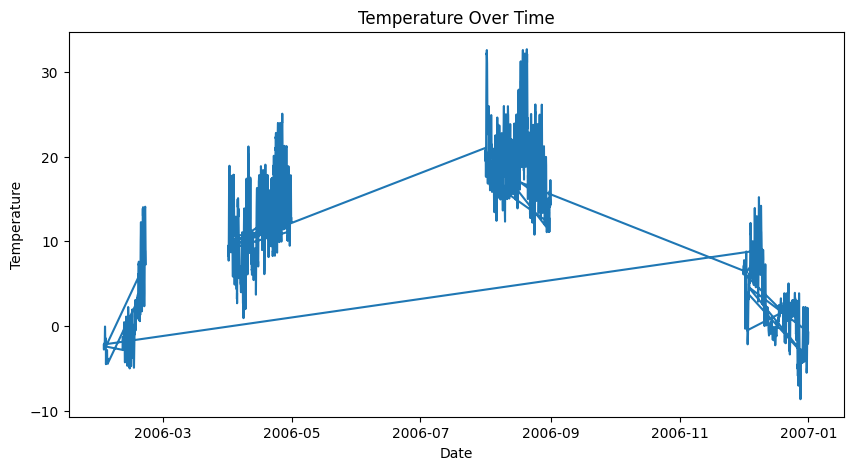

In [54]:
#plot temperature over time
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
plt.figure(figsize=(10,5))
plt.plot(df['Formatted Date'],df['Temperature (C)'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

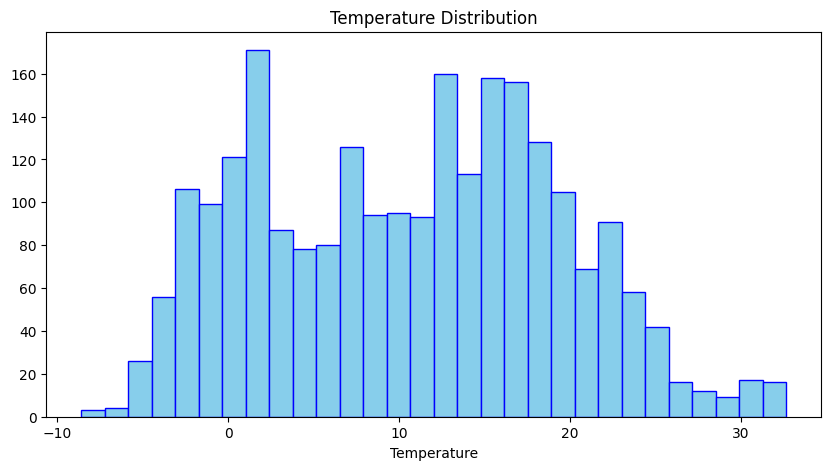

In [55]:
#Create a histogram of temperature distribution
plt.figure(figsize=(10,5))
plt.hist(df['Temperature (C)'],bins = 30 , edgecolor='blue',color='skyblue')
plt.xlabel('Temperature')
plt.title('Temperature Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

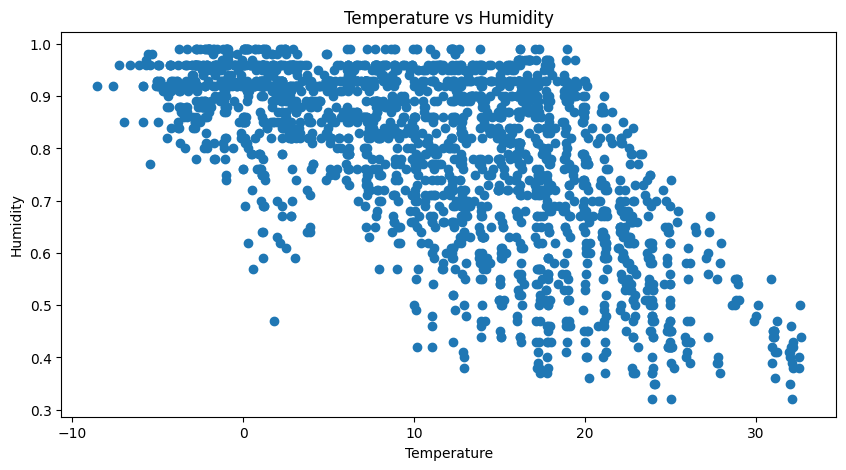

In [56]:
#Plot a scatter plot of temperature vs humidity
plt.figure(figsize=(10,5))
plt.scatter(df['Temperature (C)'],df['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.show

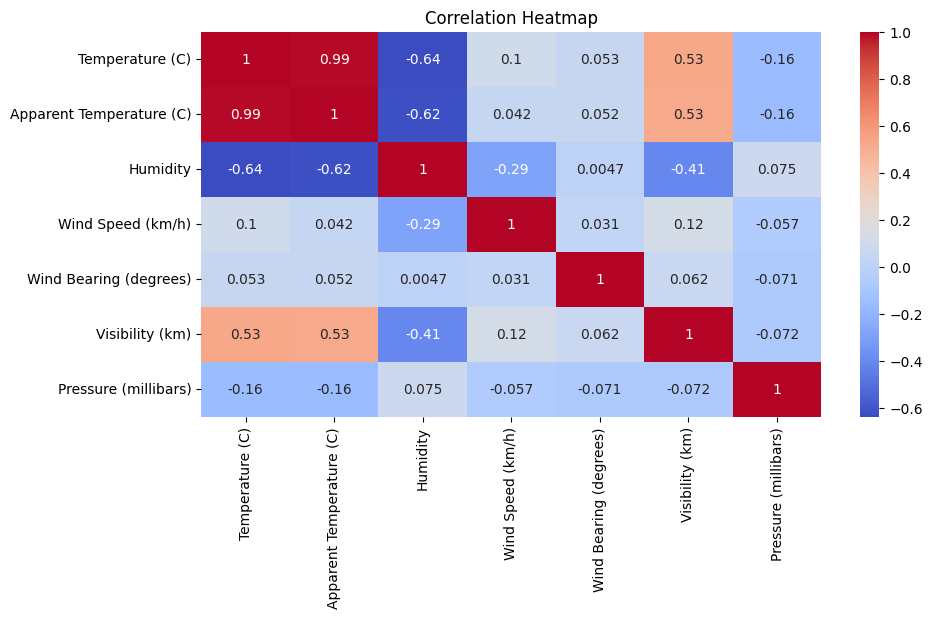

In [57]:
#Generate a correlation heatmap of the dataset
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 5))
sb.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows the correlation in the dataset
close to 1 indicates a strong positive relationship
close to -1 indicates a strong negative relationship
close to 0 indicates no linear relationship